# Tesina: The economics behind two-sided markets: key determinants of Airbnb pricing in Mexico City

## Edgar Robles Díaz

### Fuente principal: Inside Airbnb (Murray Cox) /  Trip Advisor

### Parte 3. Estimación de variables de accesibilidad (transporte) y ubicación (puntos de interés)

Si bien los atributos de los listados explican su comportamiento en precios, es necesario considerar variables de accesbilidad. Los huéspedes valoran el acceso a puntos de interés y sitios históricos, por lo tanto, la cercanía a estos puntos deberían impactar de manera positiva en los precios. 

Para este estudio, incorporamos la información de los principales puntos de interés en la Ciudad de México y calculamos distancias (semiverseno) para generar un índice de proximidad frente a estos.

Los puntos de interés incluyen zonass históricas del centro de la Ciudad de México (Alameda Central, Zócalo, Catedral Metropolitana), zonas comerciales y de alto poder adquisitivo (Polanco), zonas de esparcimiento y entretenimiento (La Condesa), zonass culturales como Coyoacán, San Jacinto, San Ángel y Xochimilco, entre otros.

La información de las coordenadas se extrajo de Trip Advisor, una página que ofrece servicios de información turísitca de diversas ciudades en el mundo. 

In [116]:
import os
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt
from sklearn.metrics.pairwise import haversine_distances
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10000)

In [3]:
os.chdir('c:\\Users\\edari\\Desktop\\CIDE\\8 Octavo\\SEMINARIO DE TITULACIÓN\\Manejo de Datos\\Código tesina')

In [4]:
os.getcwd()

'C:\\Users\\edari\\Desktop\\CIDE\\8 Octavo\\SEMINARIO DE TITULACIÓN\\Manejo de Datos\\Código tesina'

In [ ]:
### Importar información de Airbnb

In [7]:
data = pd.read_csv('inside_abnb_clean_2.csv', encoding = 'latin1')
data['key'] = 1

In [ ]:
### Importar información de Trip Advisor

In [9]:
puntos = pd.read_csv('sitios_de_interes.csv', low_memory = False, encoding = 'latin1')

puntos.rename(columns={'latitud':'latitude_2', 
                       'longitud':'longitude_2'}, inplace = True)

puntos['key'] = 1

In [59]:
puntos['nombre']

0     Murales de Diego Rivera en la Secretaría de Ed...
1                               Castillo de Chapultepec
2                                     Cineteca Nacional
3                                        Palacio Postal
4                       Basílica de la Virgen Guadalupe
5                                              Coyoacán
6                                Museo del Templo Mayor
7                                      Palacio Nacional
8                           Gran Hotel Ciudad de México
9                                             San Ángel
10        Sagrario Metropolitano de la Ciudad de México
11                                  Paseo de la Reforma
12      Metropolitan Cathedral (Catedral Metropolitana)
13                        Zócalo de la Ciudad de México
14                                           La Condesa
15                                              Polanco
16                                 Ciudad Universitaria
17                                         Arena

Para calcular el índice de distancias a los puntos de interés, se hará un outer merge de la información de Trip Advisor con la información limpia de Airbnb. Para cada una de los renglones se aplicará una función de estimación de distancias (semiverseno) para obtener la distancia a cada punto. Una vez hecho esto, se calculará la distancia inversa y se agruparan los resultados por observación para estimar el índice final.

In [12]:
data_puntos = data.merge(puntos, how = 'outer', on = 'key')

In [13]:
data_puntos.head()

,Unnamed: 0,id,host_is_superhost,host_total_listings_count,host_identity_verified,colonia,alcaldía,código_postal,latitude,longitude,accommodates,bathrooms,bedrooms,beds,precio,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,first_review,last_review,review_scores_rating,insta_book,flexible_cancel,Tipo Listado,pets_allowed,gym,breakfast,washer,dryer,parking,elevator,pool,smoking_allowed,hot_tub,ad_duration,Private room,ln_price,key,nombre,Dirección,latitude_2,longitude_2,links
0,0,58955,0.0,1.0,1.0,Roma Norte,Cuauhtémoc,06700,19.42292,-99.15775,2,1.5,1.0,1.0,1613.0,0.0,474.0,2,474.0,39,2011-12-26,2019-05-28,100.0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,90.646625,0,7.385851,1,Murales de Diego Rivera en la Secretaría de Ed...,"República de Argentina # 28, Ciudad de México ...",19.437052,-99.131976,https://www.tripadvisor.com.mx/Attraction_Revi...
1,0,58955,0.0,1.0,1.0,Roma Norte,Cuauhtémoc,06700,19.42292,-99.15775,2,1.5,1.0,1.0,1613.0,0.0,474.0,2,474.0,39,2011-12-26,2019-05-28,100.0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,90.646625,0,7.385851,1,Castillo de Chapultepec,"Primera Sección del Bosque de Chapultepec s/n,...",19.420389,-99.181914,https://www.tripadvisor.com.mx/Attraction_Revi...
2,0,58955,0.0,1.0,1.0,Roma Norte,Cuauhtémoc,06700,19.42292,-99.15775,2,1.5,1.0,1.0,1613.0,0.0,474.0,2,474.0,39,2011-12-26,2019-05-28,100.0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,90.646625,0,7.385851,1,Cineteca Nacional,"Avenida Mexico-Coyoacan # 389, Ciudad de Méxic...",19.360693,-99.164876,https://www.tripadvisor.com.mx/Attraction_Revi...
3,0,58955,0.0,1.0,1.0,Roma Norte,Cuauhtémoc,06700,19.42292,-99.15775,2,1.5,1.0,1.0,1613.0,0.0,474.0,2,474.0,39,2011-12-26,2019-05-28,100.0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,90.646625,0,7.385851,1,Palacio Postal,"Calle Tacuba 1, Ciudad de México 06000 México",19.435831,-99.140159,https://www.tripadvisor.com.mx/Attraction_Revi...
4,0,58955,0.0,1.0,1.0,Roma Norte,Cuauhtémoc,06700,19.42292,-99.15775,2,1.5,1.0,1.0,1613.0,0.0,474.0,2,474.0,39,2011-12-26,2019-05-28,100.0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,90.646625,0,7.385851,1,Basílica de la Virgen Guadalupe,Plaza de las Américas 1 - Col. Villa de Guadal...,19.484928,-99.118044,https://www.tripadvisor.com.mx/Attraction_Revi...


In [ ]:
### Función para estimar distancias

In [17]:
def haversine(row):
    """
    Calcula la distancia entre dos puntos de la Tierra.
    """
    lon1 = row['longitude']
    lat1 = row['latitude']
    
    lon2 = row['longitude_2']
    lat2 = row['latitude_2']
    
    # Convertir decimales a radianes
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # fórmula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km


In [ ]:
### Utilizar apply para calcular distancias

In [18]:
data_puntos['pi_dist'] = data_puntos.apply(lambda row : haversine(row), axis = 1)
data_puntos['pi_dist'] = data_puntos['pi_dist'].apply(lambda x : x**-1)

In [25]:
### Sumar puntos y agrupar por id

In [28]:
inv_pi = data_puntos.groupby('id')['pi_dist'].sum().to_frame()

In [39]:
data.drop('key', axis=1, inplace =True)

In [ ]:
### Merge del índice final con la base de datos original de Airbnb ###

In [32]:
data = data.merge(inv_pi, on = 'id')

In [57]:
data.drop('Unnamed: 0', axis=1, inplace =True)

In [ ]:
### Búsqueda de outliers, puntos que están situados justo donde se marcaron los puntos de interés (REforma 222, Condesa y Catedral)

In [46]:
data.pi_dist.sort_values(ascending=False)

74      195.182006
3381    151.598090
2674    138.394715
1316    110.545163
1904     75.483616
1821     57.055914
2161     55.204442
2960     53.551503
962      53.104223
3830     49.302108
4756     47.518484
690      46.964872
1582     46.065561
3760     42.547334
4676     42.482919
3896     42.045227
3059     41.542787
2982     40.858791
442      40.524951
1957     40.372045
1740     39.950321
4307     39.866767
583      38.377861
3834     37.990473
4030     37.818114
1085     36.241790
4022     36.013775
2386     35.733200
2346     35.536854
2116     35.105128
1320     35.050841
131      34.824626
4132     34.719099
1493     34.364756
4716     34.138937
4223     33.920890
372      33.649339
225      33.336128
5969     33.289980
3319     33.041172
4154     33.009066
3400     32.520055
616      31.971680
1577     31.946408
4373     31.900106
2444     31.792816
43       31.711612
2296     31.283537
828      31.281248
3027     31.218734
432      31.117489
3031     31.060687
1981     31.

In [ ]:
### Seleccionar índices

In [47]:
idx = [74, 3381, 2674, 1316]

In [ ]:
### Filtrar outliers ###

In [50]:
data.drop(idx, axis=0, inplace = True)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 58955 to 36668049
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_is_superhost          6131 non-null   float64
 1   host_total_listings_count  6131 non-null   float64
 2   host_identity_verified     6131 non-null   float64
 3   colonia                    5452 non-null   object 
 4   alcaldía                   6131 non-null   object 
 5   código_postal              6052 non-null   object 
 6   latitude                   6131 non-null   float64
 7   longitude                  6131 non-null   float64
 8   accommodates               6131 non-null   int64  
 9   bathrooms                  6131 non-null   float64
 10  bedrooms                   6131 non-null   float64
 11  beds                       6131 non-null   float64
 12  precio                     6131 non-null   float64
 13  security_deposit           6131 non-null

In [103]:
metro = pd.read_csv('estaciones-metro.csv')
metrobus = pd.read_csv('estaciones-metrobus.csv')
ecobici = pd.read_csv('estaciones_ecobici.csv', low_memory=False, encoding='latin1')

In [104]:
metro = metro[['stop_name', 'stop_lat', 'stop_lon']]
metrobus = metrobus[['Nombre','Longitud','Latitud']]
ecobici = ecobici[['address','location.lat','location.lon']]

In [105]:
ecobici.rename(columns={'address':'nombre', 'location.lat':'latitude_2', 'location.lon':'longitude_2'}, inplace=True)
metro.rename(columns={'stop_name':'nombre', 'stop_lat':'latitude_2','stop_lon':'longitude_2'}, inplace = True)
metrobus.rename(columns={'Nombre':'nombre','Longitud':'longitude_2','Latitud':'latitude_2'}, inplace=True)

In [106]:
metro['medio'] = 'Metro'
metrobus['medio'] = 'Metrobús'
ecobici['medio'] = 'Ecobici'

In [107]:
metro['key'] = 1
metrobus['key'] = 1
ecobici['key'] = 1

In [79]:
data.reset_index(inplace=True)

In [70]:
data['key'] = 1

In [80]:
data_metro = data.merge(metro, how='outer', on='key')

In [81]:
data_metro.shape

(1195545, 44)

Las variables de interés son 'latitude' y 'longitude' para la base de listados, por otro lado, las variables 'stop_lat' y 'stop_lon' son las variables de interés para la base de las estaciones del metro.

In [82]:
data_metro['metro_distance'] = data_metro.apply(lambda row: haversine(row), axis = 1)                                                         

In [84]:
data_metro = data_metro.loc[data_metro.groupby('id')["metro_distance"].idxmin()]

In [85]:
data_metro.drop(['latitude_2','longitude_2'], axis = 1, inplace=True)

In [88]:
data_metro.drop('key', axis=1, inplace=True)

In [89]:
data_metro.set_index('id', inplace=True)

In [91]:
data_metro.head()

,host_is_superhost,host_total_listings_count,host_identity_verified,colonia,alcaldía,código_postal,latitude,longitude,accommodates,bathrooms,bedrooms,beds,precio,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,first_review,last_review,review_scores_rating,insta_book,flexible_cancel,Tipo Listado,pets_allowed,gym,breakfast,washer,dryer,parking,elevator,pool,smoking_allowed,hot_tub,ad_duration,Private room,ln_price,pi_dist,nombre,medio,metro_distance
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
58955,0.0,1.0,1.0,Roma Norte,Cuauhtémoc,06700,19.42292,-99.15775,2,1.5,1.0,1.0,1613.0,0.0,474.0,2,474.0,39,2011-12-26,2019-05-28,100.0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,90.646625,0,7.385851,11.906061,Cuauhtémoc_1_2,Metro,0.452856
67703,1.0,4.0,1.0,Hipódromo,Cuauhtémoc,06100,19.41375,-99.17028,4,1.0,2.0,3.0,1802.0,3794.0,0.0,2,285.0,39,2011-11-17,2019-02-24,98.0,0,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,91.927966,0,7.496652,9.078906,Sevilla,Metro,0.906474
70644,1.0,4.0,1.0,Coyoacán,Coyoacán,04100,19.35601,-99.16167,2,1.0,1.0,1.0,1043.0,5691.0,1138.0,2,0.0,92,2012-02-14,2019-04-12,98.0,1,0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,89.003881,0,6.949856,14.564436,Coyoacán,Metro,1.110375
171109,1.0,2.0,0.0,Nápoles,Benito Juárez,NaN,19.39549,-99.17616,2,1.0,1.0,1.0,285.0,0.0,0.0,1,150.0,59,2014-03-18,2019-06-20,97.0,0,0,1,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,63.935604,1,5.652489,5.888117,San Pedro de Los Pinos,Metro,1.109405
180808,1.0,2.0,1.0,Juárez,Cuauhtémoc,06600,19.42428,-99.16843,2,1.5,1.0,1.0,1024.0,0.0,664.0,1,379.0,34,2012-04-25,2019-06-15,94.0,1,0,1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,86.671184,0,6.931472,12.414774,Sevilla,Metro,0.358963


<AxesSubplot:>

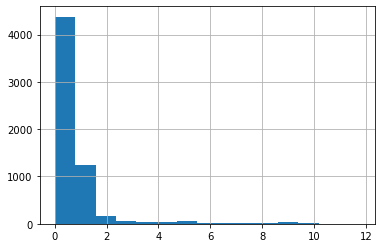

In [122]:
data_metro.metro_distance.hist(bins = 15)

<AxesSubplot:>

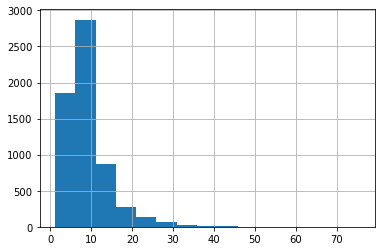

In [121]:
data_metro.pi_dist.hist(bins=15
                       )

### Agrupar estaciones por popularidad (top 10)

In [98]:
data_metro.groupby('nombre')['nombre'].count().sort_values(ascending=False).head(10).to_frame().rename(columns={'nombre':'popularidad'})

,popularidad
nombre,
Chilpancingo_1_2,518
Sevilla,447
Insurgentes_1_5,440
Polanco,433
Chapultepec,262
Patriotismo_1_2,208
Juanacatlán,200
Hospital General_1,177
San Joaquín,163


In [108]:
metro.drop(['key','medio'], axis=1, inplace = True)
metro.set_index('nombre', inplace=True)
metro.rename(columns={'latitude_2':'latitud', 'longitude_2':'longitud'}, inplace = True)

In [111]:
metro.to_csv('metro_clean.csv', encoding='latin1')

In [113]:
data_metro.to_csv('inside_abnb_clean_2.csv', encoding='latin1')

## Agregar información de metrobús y ecobicis 

In [95]:
data_metro_metrobus = data_metro.merge(metrobus, how = 'outer', on='key')

In [100]:
data_metro_metrobus['metrobus_distance'] = data_metro_metrobus.apply(lambda row: haversine(row), axis = 1)   

In [102]:
data_metro_metrobus = data_metro_metrobus.loc[data_metro_metrobus.groupby('id')["metrobus_distance"].idxmin()]

In [105]:
data_metro_metrobus.drop(['latitude_2','longitude_2'], axis = 1, inplace=True)

In [114]:
data_metro_metrobus_ecobici = data_metro_metrobus.merge(ecobici, how = 'outer', on = 'key')

In [116]:
data_metro_metrobus_ecobici['ecobici_distance'] = data_metro_metrobus_ecobici.apply(lambda row: haversine(row), axis = 1)  

In [119]:
data_metro_metrobus_ecobici = data_metro_metrobus_ecobici.loc[data_metro_metrobus_ecobici.groupby('id_x')["ecobici_distance"].idxmin()]

In [132]:
data_metro_metrobus_ecobici.head(500)

,id_x,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude_1,longitude_1,accommodates,bathrooms,bedrooms,beds,precio,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,has_availability,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,insta_book,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,reviews_per_month_2,occupancy_rate_1,occupancy_rate_2,occupancy_rate_3,has_wifi,allows_pets,has_gym,has_breakfast,is_family_friendly,has_kitchen,has_washer,has_dryer,has_parking,has_HBO,has_laptop_workspace,meses_inact,tipo_propiedad,room_type,cancelacion,alcaldia,ln_price,ln_security_deposit,ln_cleaning_fee,ln_extra_people,estacion_metro,metro_distance,estacion_metrobus,metrobus_distance,estacion_ecobici,ecobici_distance
460,22787,100,False,10.0,True,False,19.44076,-99.16324,2,1.0,1.0,1.0,1954.0,0.0,0.0,2,0.0,1,True,57,1,2010-06-26,2019-05-27,98.0,10.0,10.0,10.0,10.0,10.0,10.0,True,False,False,False,0.52,NaN,4.16,5.2,NaN,True,False,False,True,False,False,True,False,False,False,True,1.642744,Comercial,Private room,estricto_14,Cuauhtémoc,7.577634,0.000000,0.000000,0.000000,San Cosme,0.269627,Revolución,0.807811,160 - Alfonzo Herrera-Gabino Barrera,0.061183
691,44616,100,False,10.0,True,False,19.41006,-99.17645,16,9.0,9.0,1.0,1897.0,0.0,0.0,1,300.0,1,True,39,9,2011-11-09,2019-05-02,89.0,9.0,9.0,10.0,9.0,10.0,9.0,False,False,False,False,0.42,NaN,3.36,4.2,NaN,True,False,False,True,False,False,True,True,True,False,True,2.464116,Comercial,Private room,estricto_14,Cuauhtémoc,7.548029,0.000000,0.000000,5.707110,Patriotismo_1_2,0.539355,Patriotismo,0.511135,073 - Campeche - Tamaulipas,0.090204
1343,58955,100,False,1.0,True,True,19.42292,-99.15775,2,1.5,1.0,1.0,1613.0,0.0,474.0,2,474.0,3,True,39,6,2011-12-26,2019-05-28,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False,False,False,False,0.42,NaN,3.36,4.2,NaN,True,False,False,False,False,True,False,False,True,False,False,1.609889,Privado,Entire home/apt,estricto_14,Cuauhtémoc,7.385851,0.000000,6.163315,6.163315,Cuauhtémoc_1_2,0.452856,Cuauhtémoc,0.462915,127 - Puebla-Merida,0.075172
1668,67703,100,True,4.0,True,True,19.41375,-99.17028,4,1.0,2.0,3.0,1802.0,3794.0,0.0,2,285.0,2,True,39,4,2011-11-17,2019-02-24,98.0,10.0,10.0,10.0,10.0,10.0,10.0,False,False,False,False,0.42,NaN,3.36,4.2,NaN,True,False,False,False,True,True,True,False,False,False,True,4.665394,Comercial,Entire home/apt,estricto_14,Cuauhtémoc,7.496653,8.241440,0.000000,5.655992,Sevilla,0.906474,Sonora,0.428242,061 - Avenida México - Sonora,0.079134
2119,70644,100,True,4.0,True,True,19.35601,-99.16167,2,1.0,1.0,1.0,1043.0,5691.0,1138.0,2,0.0,3,True,92,11,2012-02-14,2019-04-12,98.0,10.0,10.0,10.0,10.0,10.0,10.0,True,False,False,False,1.02,NaN,8.16,10.2,NaN,True,False,False,False,True,True,True,True,True,False,True,3.121214,Comercial,Entire home/apt,moderado,Coyoacán,6.949856,8.646817,7.037906,0.000000,Coyoacán,1.110375,José María Velasco,2.304210,443 - Bruno Trave-Avenida México-Coyoacan,0.406757
2588,98378,100,True,16.0,True,True,19.40236,-99.18163,15,6.0,6.0,8.0,4534.0,9485.0,1328.0,6,0.0,2,True,140,37,2011-12-05,2019-07-01,96.0,10.0,10.0,10.0,10.0,9.0,10.0,False,False,False,True,1.51,2.0,12.08,15.1,16.0,True,False,False,False,True,True,True,True,False,False,True,0.492823,Comercial,Entire home/apt,estricto_14,Miguel Hidalgo,8.419360,9.157573,7.192182,0.000000,Patriotismo_1_2,0.489056,Antonio Maceo,0.527743,172 - General Francisco Murguia-Jose Martí,0.125844
3228,107078,100,False,4.0,True,True,19.43130,-99.19438,2,1.5,1.0,1.0,4079.0,4458.0,1233.0,1,0.0,4,True,9,3,2016-05-30,2019-07-02,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True,False,False,False,0.24,1.0,1.92,2.4,8.0,True,True,False,False,False,True,True,True,True,False,True,0.459968,C

In [123]:
### Limpiar variables y renombrar

In [125]:
data_metro_metrobus_ecobici.drop(['stop_id', 'id_y', 'latitude_2', 'longitude_2'],axis = 1, inplace = True)

data_metro_metrobus_ecobici.rename(columns={'stop_name':'estacion_metro',
                                            'Nombre':'estacion_metrobus',
                                            'address':'estacion_ecobici'}, inplace=True )

data_metro_metrobus_ecobici.rename(columns={'id_x':'id'}, inplace = True)

data_metro_metrobus_ecobici.drop(['key','Línea'],axis = 1, inplace = True)

In [127]:
data_metro_metrobus_ecobici.to_stata('listados_limpio_transporte.dta')